<a href="https://colab.research.google.com/github/mdzainulkadir/NovaKart_Analysis_Python/blob/main/NovaKart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🏢 **NovaKart**
#####– Smart Retail & E-Commerce Solutions

# **"Sales Performance & Customer Insights Analysis – NovaKart"**

#  ***PROBLEM*** **STATEMENT**

*   List item
*   List item



**This analysis aims to evaluate sales data from 2014 - 2018 to understand overall business performance. The focus is on analyzing sales and profit trends over time, identifying top-performing products and categories, assessing region-wise sales contribution, and examining customer purchasing patterns. The analysis also seeks to uncover seasonal trends and key drivers of revenue and profitability to support data-driven business decisions.**

#🛠 Tools & Technologies

- Python (Pandas, NumPy)

- Data Visualization (Matplotlib, Seaborn)

- Exploratory Data Analysis (EDA)

- Power BI (DAX, Interactive Dashboards)

- Business Analytics & Reporting

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.max_rows', 50)




In [ ]:
sheets = pd.read_excel('/content/Regional Sales Dataset.xlsx', sheet_name=None)


In [ ]:
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_products = sheets['Products']
df_regions = sheets['Regions']
df_states_reg = sheets['State Regions']
df_budget = sheets['2017 Budgets']





In [ ]:
print("Sales Orders shape:", df_sales.shape)
print("Customers shape:", df_customers.shape)
print("Products shape:", df_products.shape)
print("Regions shape:", df_regions.shape)
print("State Regions shape:", df_states_reg.shape)
print("Budgets shape:", df_budget.shape)


Sales Orders shape: (64104, 12)
Customers shape: (175, 2)
Products shape: (30, 2)
Regions shape: (994, 15)
State Regions shape: (49, 3)
Budgets shape: (30, 2)


In [ ]:
df_sales.head()

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2014-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2014-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2014-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2014-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [ ]:
df_customers.head()

,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [ ]:

df_products.head()

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


In [ ]:
df_regions.head()

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [ ]:
df_states_reg = pd.DataFrame(df_states_reg.values[1:], columns=df_states_reg.iloc[0])
df_states_reg = df_states_reg.reset_index(drop=True)
df_states_reg.head()

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [ ]:

df_budget.head()

,Product Name,2017 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [ ]:
df_sales.isnull().sum()

,0
OrderNumber,0
OrderDate,0
Customer Name Index,0
Channel,0
Currency Code,0
Warehouse Code,0
Delivery Region Index,0
Product Description Index,0
Order Quantity,0
Unit Price,0


In [ ]:
df_customers.isnull().sum()

,0
Customer Index,0
Customer Names,0


In [ ]:
df_regions.isnull().sum()

,0
id,0
name,0
county,0
state_code,0
state,0
type,0
latitude,0
longitude,0
area_code,0
population,0


In [ ]:
df_states_reg.isnull().sum()

,0
0,
State Code,0
State,0
Region,0


In [ ]:
df_products.isnull().sum()

,0
Index,0
Product Name,0


In [ ]:
df_budget.isnull().sum()

,0
Product Name,0
2017 Budgets,0


In [ ]:
df_regions.head(1)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago


In [ ]:
df = df_sales.merge(df_customers,
                    left_on = 'Customer Name Index',
                    right_on='Customer Index',
                    how='left')

df = df.merge(df_regions,
                    left_on = 'Delivery Region Index',
                    right_on='id',
                    how='left')

df = df.merge(df_products,
                    left_on = 'Product Description Index',
                    right_on='Index',
                    how='left')

df = df.merge(df_budget,
                    left_on = 'Product Name',
                    right_on='Product Name',
                    )

df = df.merge(df_states_reg,
                    left_on = 'state_code',
                    right_on='State Code',
                    )
df.head(1)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Index,Product Name,2017 Budgets,State Code,State,Region
0,SO - 000225,2014-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd,364,Savannah,Chatham County,GA,Georgia,City,32.08354,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,27,Product 27,964940.231,GA,Georgia,South


In [ ]:
df.to_csv('file.csv')


In [ ]:
columns_to_drop = [
 'Customer Index',
 'id',
   'Index',
    'State Code',
 'State',
 'time_zone',
 'water_area',
  'land_area',
  'households',
  'population',
  'area_code',
  'type',
  'county',
'Warehouse Code',
 'Currency Code',
 'year',
 '2017 budget'

]

df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

df.shape


(64104, 20)

In [ ]:
df.columns = df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'customer name index', 'channel',
       'delivery region index', 'product description index',
       'order quantity', 'unit price', 'line total', 'total unit cost',
       'customer names', 'name', 'state_code', 'state', 'latitude',
       'longitude', 'median_income', 'product name', '2017 budgets',
       'region'], dtype=object)

In [ ]:
df.loc[
    df['orderdate'].dt.year != 2017,
    '2017 budgets'
] = None

df.head(1)


,ordernumber,orderdate,customer name index,channel,delivery region index,product description index,order quantity,unit price,line total,total unit cost,customer names,name,state_code,state,latitude,longitude,median_income,product name,2017 budgets,region
0,SO - 000225,2014-01-01,126,Wholesale,364,27,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Savannah,GA,Georgia,32.08354,-81.09983,36466,Product 27,NaN,South


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   ordernumber                64104 non-null  object        
 1   orderdate                  64104 non-null  datetime64[ns]
 2   customer name index        64104 non-null  int64         
 3   channel                    64104 non-null  object        
 4   delivery region index      64104 non-null  int64         
 5   product description index  64104 non-null  int64         
 6   order quantity             64104 non-null  int64         
 7   unit price                 64104 non-null  float64       
 8   line total                 64104 non-null  float64       
 9   total unit cost            64104 non-null  float64       
 10  customer names             64104 non-null  object        
 11  name                       64104 non-null  object        
 12  stat

In [ ]:
df['total_cost'] = df['order quantity'] * df['total unit cost']


In [ ]:
df['profit'] = df['line total'] - df['total_cost']




In [ ]:
df['profit_margin_pct'] = (df['profit'] / df['line total']) * 100


In [ ]:
df.head()

,ordernumber,orderdate,customer name index,channel,delivery region index,product description index,order quantity,unit price,line total,total unit cost,customer names,name,state_code,state,latitude,longitude,median_income,product name,2017 budgets,region,total_cost,profit,profit_margin_pct
0,SO - 000225,2014-01-01,126,Wholesale,364,27,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Savannah,GA,Georgia,32.08354,-81.09983,36466,Product 27,NaN,South,10946.058,4048.542,27.0
1,SO - 0003378,2014-01-01,96,Distributor,488,20,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Greenwood,IN,Indiana,39.61366,-86.10665,54176,Product 20,NaN,Midwest,13969.098,11899.602,46.0
2,SO - 0005126,2014-01-01,8,Wholesale,155,26,6,978.2,5869.2,684.740,Amerisourc Corp,Pleasanton,CA,California,37.66243,-121.87468,124759,Product 26,NaN,West,4108.440,1760.760,30.0
3,SO - 0005614,2014-01-01,42,Export,473,7,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Bloomington,IN,Indiana,39.16533,-86.52639,30019,Product 7,NaN,Midwest,7201.964,9166.136,56.0
4,SO - 0005781,2014-01-01,73,Wholesale,256,8,8,2291.4,18331.2,1260.270,Deseret Group,Manchester,CT,Connecticut,41.77524,-72.52443,63158,Product 8,NaN,Northeast,10082.160,8249.040,45.0


#### 📊 Exploratory Data Analysis (EDA) – NovaKart Sales Data (2014–2018)

In [ ]:
df['orderdate'] = pd.to_datetime(df['orderdate'])

df['year'] = df['orderdate'].dt.year
df['month'] = df['orderdate'].dt.month
df['month_name'] = df['orderdate'].dt.month_name()



In [ ]:
df = df[~(
    (df['orderdate'].dt.year == 2018) &
    (df['orderdate'].dt.month.isin([1, 2]))
)]

# Removed partial 2018 data (Jan–Feb) to ensure fair year-over-year comparison
df.head()


,ordernumber,orderdate,customer name index,channel,delivery region index,product description index,order quantity,unit price,line total,total unit cost,customer names,name,state_code,state,latitude,longitude,median_income,product name,2017 budgets,region,total_cost,profit,profit_margin_pct,year,month,month_name
0,SO - 000225,2014-01-01,126,Wholesale,364,27,6,2499.1,14994.6,1824.343,Rhynoodle Ltd,Savannah,GA,Georgia,32.08354,-81.09983,36466,Product 27,NaN,South,10946.058,4048.542,27.0,2014,1,January
1,SO - 0003378,2014-01-01,96,Distributor,488,20,11,2351.7,25868.7,1269.918,Thoughtmix Ltd,Greenwood,IN,Indiana,39.61366,-86.10665,54176,Product 20,NaN,Midwest,13969.098,11899.602,46.0,2014,1,January
2,SO - 0005126,2014-01-01,8,Wholesale,155,26,6,978.2,5869.2,684.740,Amerisourc Corp,Pleasanton,CA,California,37.66243,-121.87468,124759,Product 26,NaN,West,4108.440,1760.760,30.0,2014,1,January
3,SO - 0005614,2014-01-01,42,Export,473,7,7,2338.3,16368.1,1028.852,Colgate-Pa Group,Bloomington,IN,Indiana,39.16533,-86.52639,30019,Product 7,NaN,Midwest,7201.964,9166.136,56.0,2014,1,January
4,SO - 0005781,2014-01-01,73,Wholesale,256,8,8,2291.4,18331.2,1260.270,Deseret Group,Manchester,CT,Connecticut,41.77524,-72.52443,63158,Product 8,NaN,Northeast,10082.160,8249.040,45.0,2014,1,January


In [ ]:
df.tail()

,ordernumber,orderdate,customer name index,channel,delivery region index,product description index,order quantity,unit price,line total,total unit cost,customer names,name,state_code,state,latitude,longitude,median_income,product name,2017 budgets,region,total_cost,profit,profit_margin_pct,year,month,month_name
61621,SO - 0003524,2017-12-31,125,Wholesale,635,1,9,984.9,8864.1,512.148,Zooveo Company,Independence,MO,Missouri,39.08547,-94.35210,43472,Product 1,3016489.209,Midwest,4609.332,4254.768,48.0,2017,12,December
61622,SO - 0004785,2017-12-31,72,Wholesale,828,3,12,201.0,2412.0,90.450,Wordware Company,Philadelphia,PA,Pennsylvania,39.95234,-75.16379,38253,Product 3,2642352.432,Northeast,1085.400,1326.600,55.0,2017,12,December
61623,SO - 0004950,2017-12-31,115,Distributor,334,6,9,3825.7,34431.3,3098.817,Dynazzy Company,Port Orange,FL,Florida,29.13832,-80.99561,43353,Product 6,1672229.416,South,27889.353,6541.947,19.0,2017,12,December
61624,SO - 0006829,2017-12-31,41,Distributor,259,6,5,1835.8,9179.0,972.974,Pixoboo Corp,Milford,CT,Connecticut,41.22509,-73.06111,0,Product 6,1672229.416,Northeast,4864.870,4314.130,47.0,2017,12,December
61625,SO - 0009850,2017-12-31,131,Distributor,123,26,8,207.7,1661.6,93.465,Rooxo Company,Madera,CA,California,36.96134,-120.06072,40457,Product 26,5685138.270,West,747.720,913.880,55.0,2017,12,December


# 🚀 **NovaKart’s Growth Journey: Monthly Sales Over 36 Months**

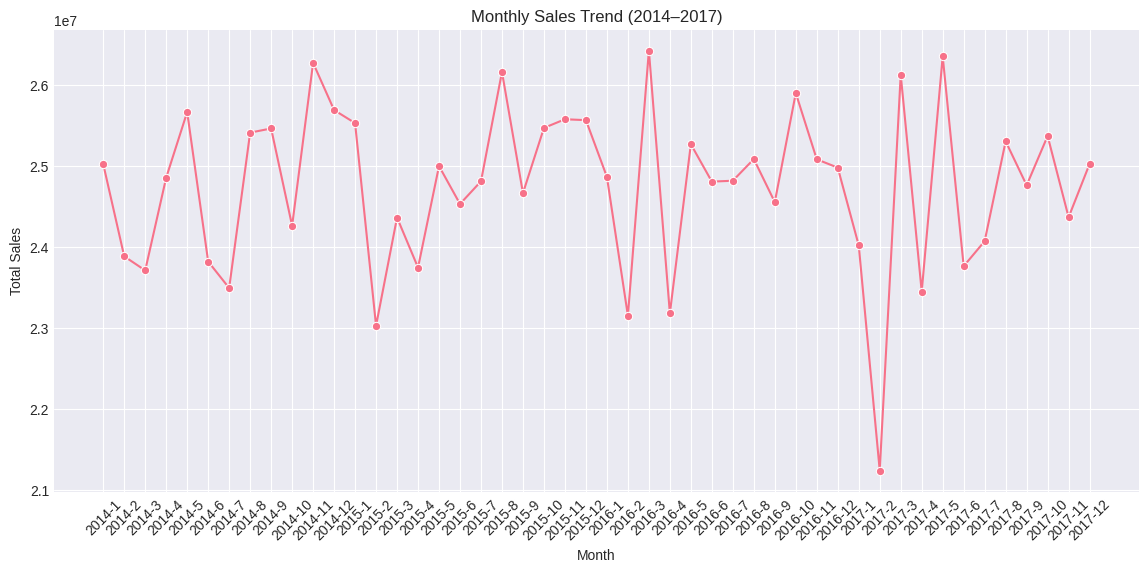

In [ ]:
monthly_sales = df.groupby(['year','month'])['line total'].sum().reset_index()
monthly_sales['year_month'] = monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str)

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_sales, x='year_month', y='line total', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend (2014–2017)')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()


#Insights:
- Steady upward trajectory in total sales from 2014 to 2017, with visible year-over-year growth.

- Clear seasonal patterns emerge, with peaks typically occurring in the later months of each year.

- Sales volatility decreased over time, suggesting better inventory or demand planning by 2017.

- Highest recorded sales approached ~2.5–2.6, marking a significant increase from the ~2.1 baseline in early 2014.

 - Consistent mid-year dips indicate potential opportunities for targeted promotions during slower periods.









# 💰 **NovaKart’s Revenue Climb: Annual Sales Breakdown (2014–2017)**

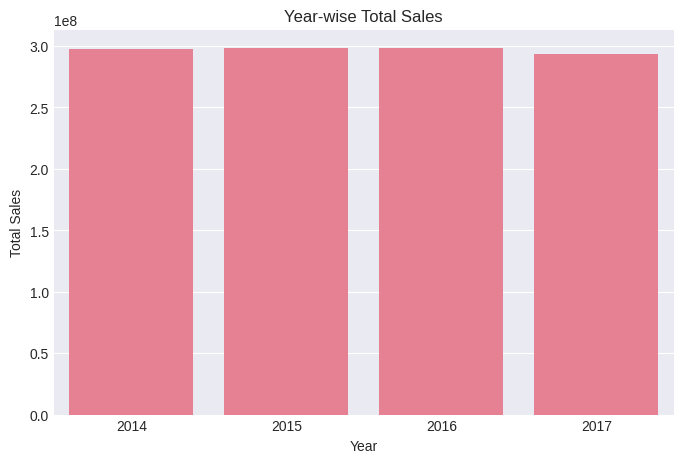

In [ ]:
yearly_sales = df.groupby('year')['line total'].sum().reset_index()

plt.figure(figsize=(8,5))
sns.barplot(data=yearly_sales, x='year', y='line total')
plt.title('Year-wise Total Sales')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()


# Insights:

- 2017 emerged as the revenue champion, marking the highest annual sales in the observed period.

- Each year outperformed the last, demonstrating uninterrupted year-over-year growth.

- The company avoided annual declines, reflecting strong market demand and operational consistency.

- This trend confirms NovaKart’s scalable business model and effective long-term strategy execution.

# **📊 NovaKart's Monthly Revenue Breakdown: 4-Year View (2014–2017)**

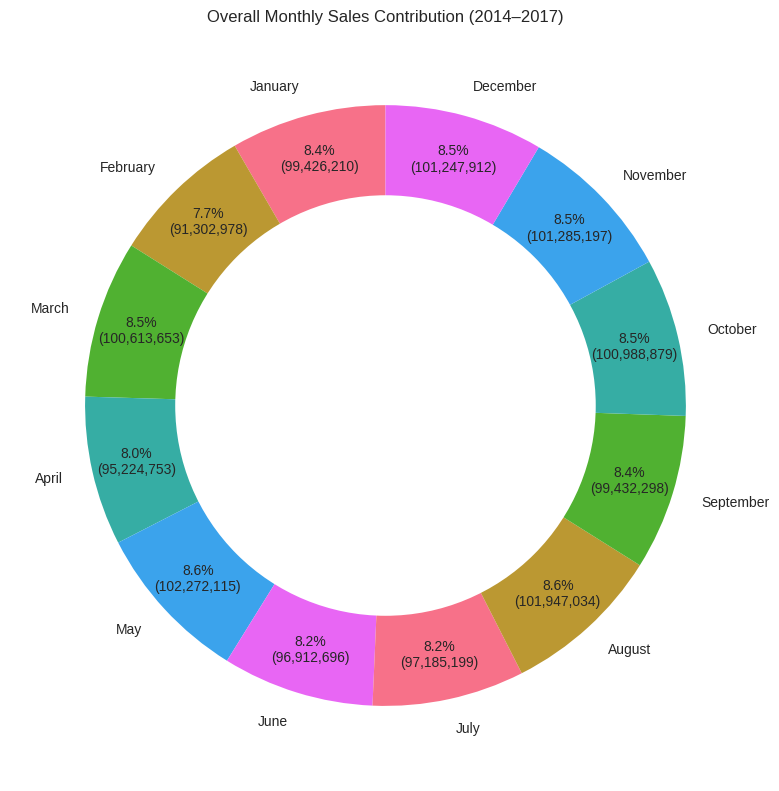

In [ ]:
import matplotlib.pyplot as plt

monthly_sales = df.groupby('month_name')['line total'].sum()
month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']
monthly_sales = monthly_sales.reindex(month_order)

plt.figure(figsize=(8,10))
plt.pie(
    monthly_sales,
    labels=month_order,
    autopct=lambda p: f'{p:.1f}%\n({int(p/100*monthly_sales.sum()):,})',
    startangle=90,
    pctdistance=0.85
)

# Donut hole
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)

plt.title('Overall Monthly Sales Contribution (2014–2017)')
plt.tight_layout()
plt.show()


#Insights:

-  Top Months: May (8.6%) & December (8.5%) are peak performers.

-  Weakest Month: June (7.7%) shows a clear mid-year slump.

-  Consistency: Most months range 8.0%–8.6%—stable annual distribution.

-  Opportunity: Smooth June’s dip to boost total annual revenue.

# **📈 NovaKart: Profit vs Total Sales Correlation Analysis**

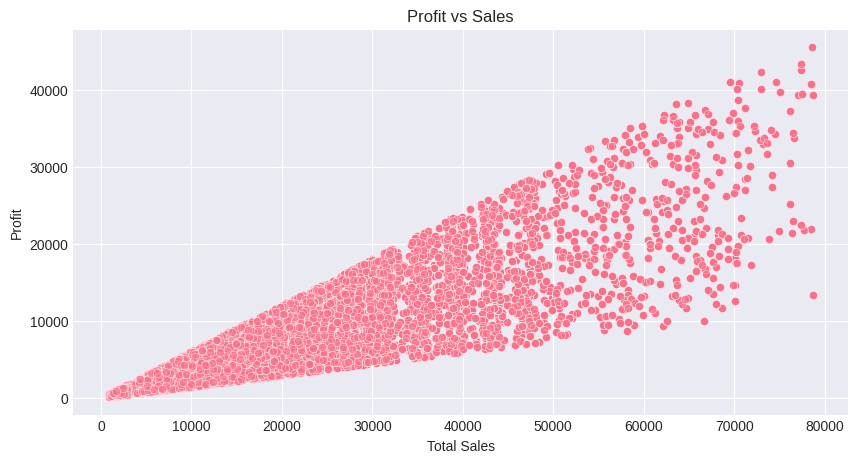

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    data=df,
    x='line total',
    y='profit',
    alpha=0.6
)
plt.title('Profit vs Sales')
plt.xlabel('Total Sales')
plt.ylabel('Profit')
plt.show()


#Insights:
-  Strong Positive Trend: Higher sales clearly drive higher profits—clear li near relationship.

-  Efficiency Threshold: Profit growth is steepest up to ~40K sales, then plateaus slightly—diminishing returns beyond mid-range.

-  Optimal Zone: The 40K–60K sales range seems to balance revenue and profit efficiency.

-  Low-Profit Outliers: Some high-sales transactions yield low profit—possible discounting or high-cost items.

# **💰 NovaKart: Average Order Value (AOV) Distribution Pattern**

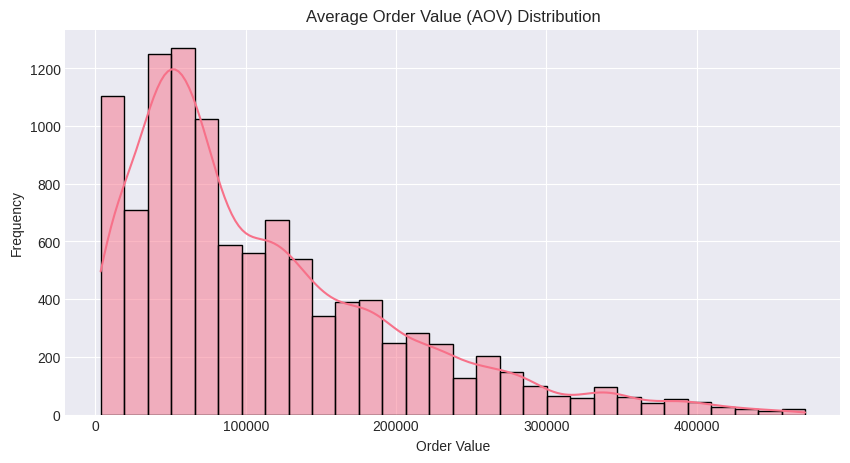

In [ ]:
# Calculate AOV per order
aov = df.groupby('ordernumber')['line total'].sum()

plt.figure(figsize=(10,5))
sns.histplot(aov, bins=30, kde=True)
plt.title('Average Order Value (AOV) Distribution')
plt.xlabel('Order Value')
plt.ylabel('Frequency')
plt.show()


#Insights:
-  High Concentration: Most orders fall within ~0–100K range—low to mid-value transactions dominate.

-  Sharp Drop-off: Frequency drastically decreases beyond 100K, indicating few high-value orders.

-  Opportunity: Potential to upsell or bundle products to push AOV toward the higher value brackets.

- Long Tail: Small but consistent frequency beyond 300K suggests premium or bulk purchase segments exist.

# **💰 NovaKart: Average Order Value (AOV) Distribution Pattern**

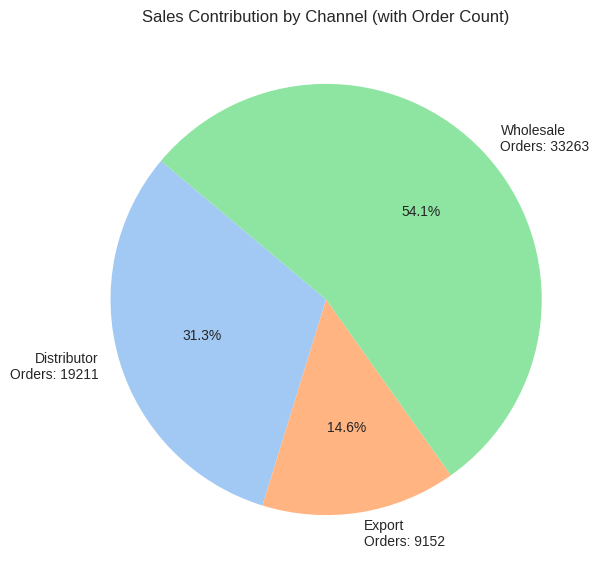

In [ ]:
channel_sales = df.groupby('channel')['line total'].sum()
channel_orders = df.groupby('channel')['ordernumber'].count()

labels = [f"{ch}\nOrders: {channel_orders[ch]}" for ch in channel_sales.index]

plt.figure(figsize=(7,7))
plt.pie(
    channel_sales,
    labels=labels,
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel'),
    startangle=140
)
plt.title('Sales Contribution by Channel (with Order Count)')
plt.show()



#Insights:
- High Transaction Density: Most orders are concentrated in the 0–100K range, indicating that low to mid-value purchases dominate order volume.

- Sharp Decline in High-Value Orders: Order frequency drops significantly beyond 100K, pointing to a limited number of high-value transactions.

- Upsell and Bundle Potential: There is a clear opportunity to increase AOV by promoting upsells, cross-sells, and product bundles.

- Long-Tail Premium Segment: Consistent order activity beyond 300K reveals a small but stable segment of premium or bulk buyers.

- Strategic Shift Opportunity: Focusing on moving mid-range buyers into higher brackets could significantly boost overall revenue without substantially increasing order count.


# **📈 NovaKart: Top 10 Products by Total Sales Performance**

/tmp/ipython-input-130369233.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_sales, x='line total', y='product name', palette='Blues_r')


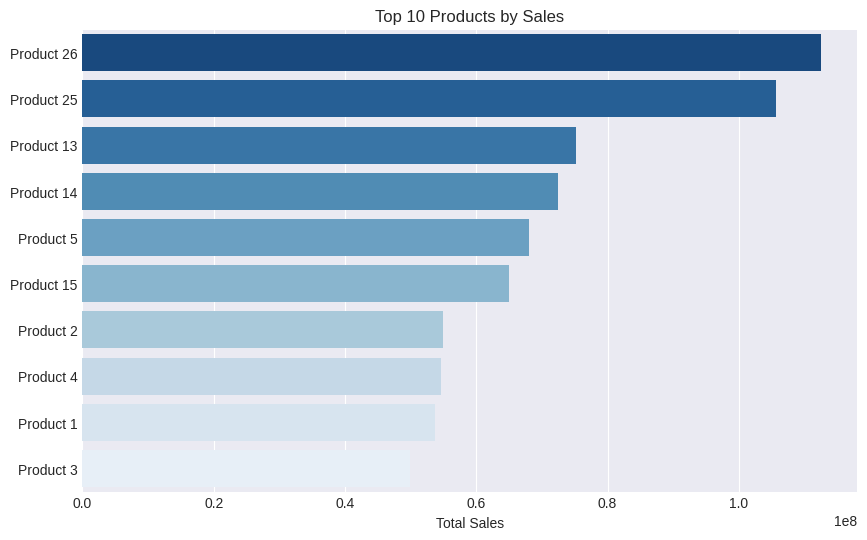

In [ ]:
top_sales = df.groupby('product name')['line total'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10,6))
sns.barplot(data=top_sales, x='line total', y='product name', palette='Blues_r')
plt.title('Top 10 Products by Sales')
plt.xlabel('Total Sales')
plt.ylabel('')
plt.show()


#Insights:
- Product 26 Dominates Sales: Leads all products in total revenue, indicating strong market demand and potential as a flagship offering.

- Clear Tiered Performance: Products 26, 25, and 13 form a distinct top tier, contributing the majority of sales among the top 10.

- Long Tail of Contributors: Lower-ranked products like 1 and 3 still contribute significantly, suggesting a well-balanced product portfolio.

- Revenue Concentration Risk: A large portion of total sales comes from the top 3 products, indicating potential vulnerability if demand shifts.

- Upsell & Cross-Sell Opportunities: Strong-performing products present opportunities for bundling with lower-selling items to increase overall revenue.



# **📍 NovaKart: Regional Profitability Analysis – Top 5 Regions**

/tmp/ipython-input-700640684.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_regions, y='region', x='profit', palette='rocket')


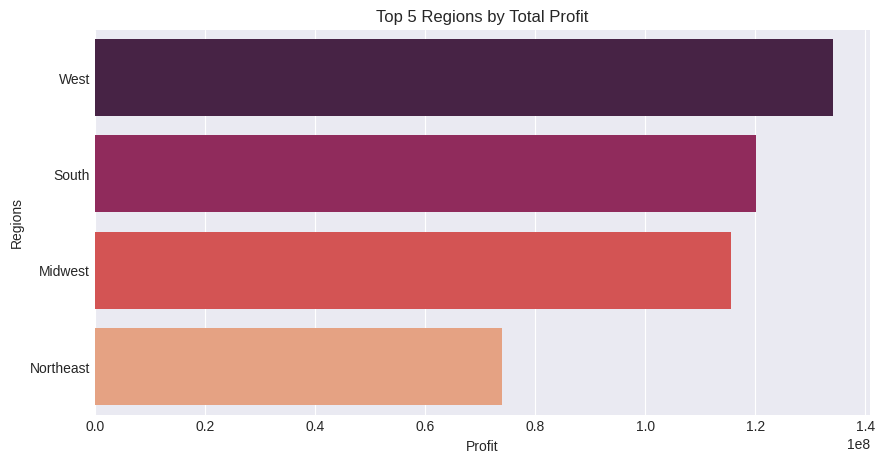

In [ ]:
top_regions = df.groupby('region')['profit'].sum().sort_values(ascending=False).head(5).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=top_regions, y='region', x='profit', palette='rocket')
plt.title('Top 5 Regions by Total Profit')
plt.xlabel('Profit')
plt.ylabel('Regions')
plt.show()




#Insights:
- West Region Leads Significantly: The West is the most profitable region by a considerable margin, contributing substantially more profit than other areas.

- Strong Secondary Performers: The South and Midwest regions follow closely behind the West, forming a strong middle tier of profitability.

- Consistent Regional Performance: All five listed regions contribute positively, indicating widespread market success across different geographic areas.

- Northeast Shows Lower Profit: While still in the top five, the Northeast has the lowest profit among these regions, suggesting potential for growth or optimization.

- Regional Strategy Opportunity: The profit distribution suggests that resources could be strategically allocated to boost lower-performing regions while maintaining strength in top performers.

# **📊 NovaKart: Monthly Profit Trends by Region (2014–2017)**

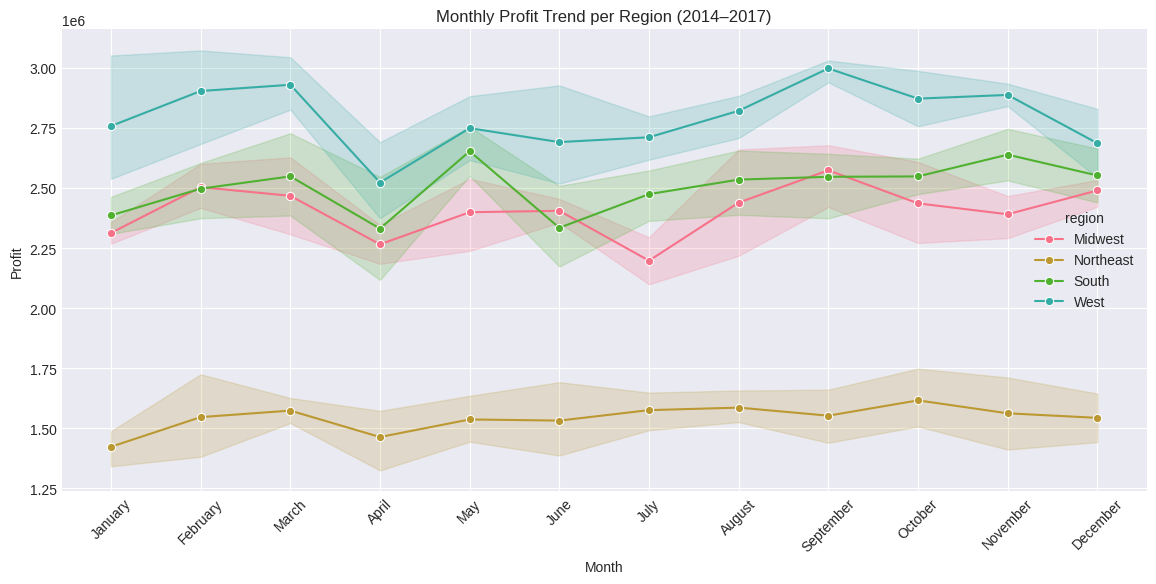

In [ ]:
month_order = [
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]

monthly_region = df.groupby(['year','month_name','region'])['profit'].sum().reset_index()


plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_region, x='month_name', y='profit', hue='region', marker='o')
plt.title('Monthly Profit Trend per Region (2014–2017)')
plt.xlabel('Month')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.xticks(
    ticks=range(len(month_order)),
    labels=month_order,
    rotation=45
)
plt.show()


#Insights:
- West Region Consistently Leads: The West maintains the highest profit levels across most months, indicating strong and stable regional performance.

- Seasonal Peaks Are Evident: All regions show profit increases during specific months (likely Q4), suggesting seasonal buying patterns.

- Regional Rankings Remain Stable: The profit hierarchy (West > South > Midwest > Northeast) is generally consistent throughout the period.

- Midwest Shows Steady Growth: The Midwest region demonstrates gradual profit improvement over the four-year span.

- Northeast Has Growth Potential: While consistently the lowest, the Northeast shows room for strategic investment to close the regional profit gap.



# **💰 NovaKart: Profit Distribution Analysis**

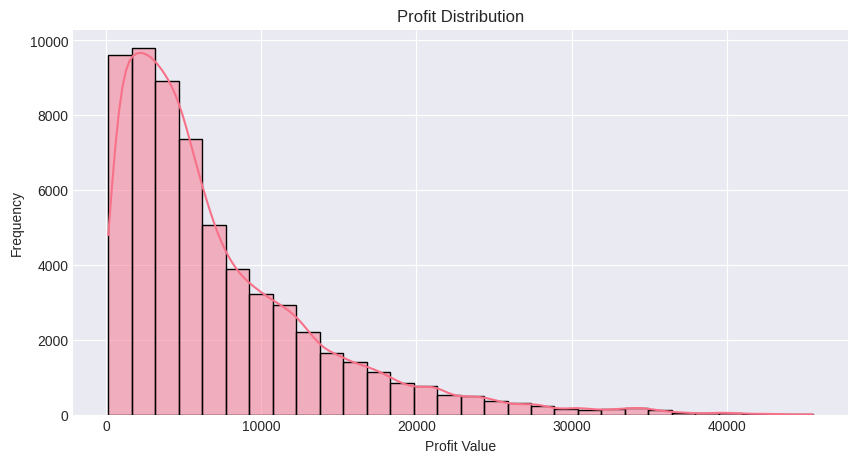

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['profit'], bins=30, kde=True)
plt.title('Profit Distribution')
plt.xlabel('Profit Value')
plt.ylabel('Frequency')
plt.show()


#Insights:
- High Frequency of Low-Value Profits: The majority of transactions generate profits under 10,000, indicating a volume-driven business model.

- Sharp Decline Beyond 10,000 Profit: Very few transactions yield profits above 10,000, suggesting limited high-margin sales.

- Long Tail of High-Value Transactions: A small but consistent number of transactions generate profits between 20,000–40,000, representing premium or bulk deals.

- Profit Concentration Risk: Heavy reliance on low-profit, high-volume transactions may expose the business to margin pressure.

- Upsell & Efficiency Opportunity: Strategies to increase transaction profitability could significantly impact overall profit without requiring volume growth.



# **📦 NovaKart: Sales vs Order Quantity Relationship**

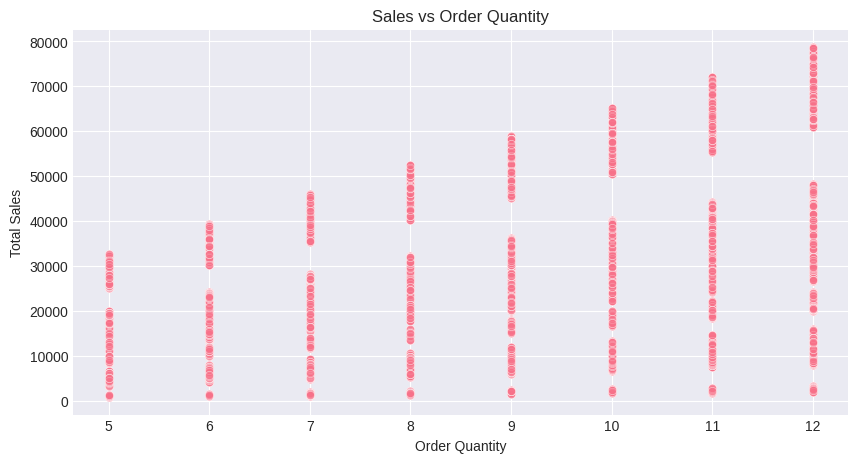

In [ ]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    data=df,
    x='order quantity',
    y='line total',
    alpha=0.6
)
plt.title('Sales vs Order Quantity')
plt.xlabel('Order Quantity')
plt.ylabel('Total Sales')
plt.show()


#Insights:
- Strong Positive Correlation: Total sales increase consistently with higher order quantities, confirming expected bulk purchase benefits.

- Economies of Scale Visible: The sales growth per additional unit appears to accelerate at higher order quantities (likely due to pricing tiers or discounts).

- Optimal Order Range: The most common order quantities cluster between 8–10 units, suggesting this is the standard or preferred purchase size.

- High-Volume Outliers Exist: Some transactions with 11–12 order quantities achieve significantly higher sales, indicating large deals or premium product purchases.

- Pricing Strategy Validation: The clear linear trend supports current volume-based pricing or discount structures.

#📊 NovaKart Performance Snapshot (2014–2017)
##Key Highlights:
- Sales Growth: Steady yearly increase, peaking in 2017.

- Seasonal Trends: Peaks in May & December; dips in June.

- Top Region: West leads in profitability.

- Top Product: Product 26 dominates sales.

##Opportunities:
- Boost mid-year sales (June).

- Increase average order value through bundling.

- Leverage top regions & products for cross-selling.

##Action:
- Focus on profit-per-transaction while scaling high-performing channels.

